# Real Estate Price Predictor

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('data.csv')

In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283709,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703892,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

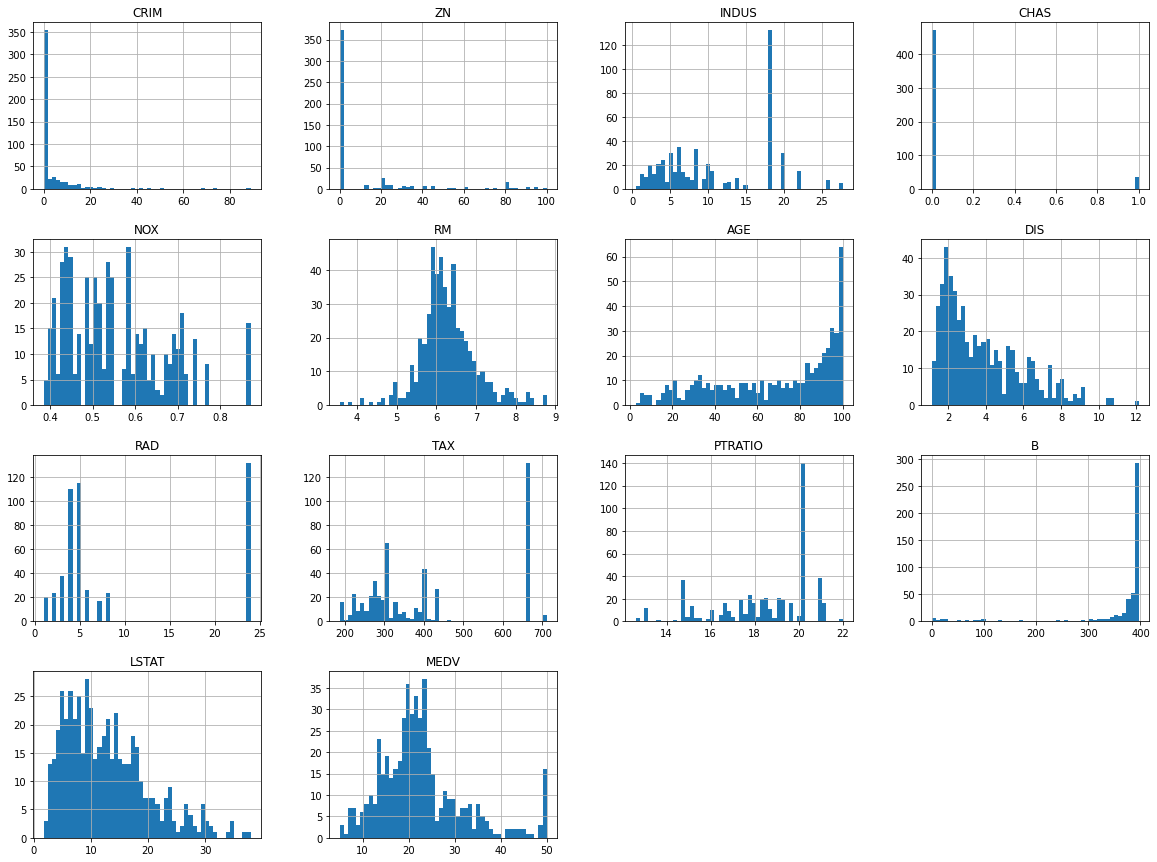

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
data.hist(bins=50,figsize=(20,15))

## Test Train Split

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['CHAS']):
    train_data=data.loc[train_index]
    test_data=data.loc[test_index]

## Seeing how other columns are correlated to MEDV

In [7]:
corr_matrix=train_data.corr()
corr_matrix.MEDV.sort_values(ascending=False)

MEDV       1.000000
RM         0.678326
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

## Removing outliers from column which is most correlated to MEDV

In [8]:
lstat_mean=train_data.LSTAT.mean()
lstat_std=train_data.LSTAT.std()
train_data=train_data[(train_data.LSTAT>lstat_mean-3*lstat_std ) & (train_data.LSTAT<lstat_mean+3*lstat_std)]

## Seperating labels

In [9]:
train_labels=train_data.MEDV
train_data.drop('MEDV',axis=1,inplace=True)
test_labels=test_data.MEDV
test_data.drop('MEDV',axis=1,inplace=True)
train_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 402, dtype: float64

## Creating a Pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scalar',StandardScaler())])

In [11]:
train_data_tr=my_pipeline.fit_transform(train_data)

In [12]:
#from sklearn.linear_model import LinearRegression
#model=LinearRegression()
#from sklearn.tree import DecisionTreeRegressor
#model=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#from sklearn.linear_model import Lasso
#model=Lasso(alpha=0.1)
#from sklearn.svm import SVR
#model=SVR()
model.fit(train_data_tr,train_labels)

RandomForestRegressor()

## Cross Validation for model evaluation

In [13]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,train_data_tr,train_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[2.93137409 3.028659   4.5004742  2.61917341 3.2435658  2.60665213
 4.37862299 3.2442651  3.07281375 3.31867   ]
3.294427049367189
0.6177601276387397


## For Linear Regression
[4.15325835 3.68147354 5.32237127 3.88688456 5.35533505 4.43256548
 7.42239097 5.43823621 4.11025773 6.01707235]
 
4.981984549215769

1.1013418408844715

## For Decision Tree Regressor
[4.22111417 5.87777957 5.34127794 4.05826318 3.49385174 4.8364243
 7.8542027  3.79381075 3.28717204 4.17516467]
 
4.693906104977619

1.3020868764223836
## For Random Forest Regressor
[2.75956155 3.04268673 4.39582324 2.49193406 3.4533133  2.76638938
 4.27689756 3.33676996 3.08511562 3.4615292 ]
 
3.307002058937764

0.5956329226317544
## For Lasso Regression
[4.23430256 3.56925535 5.37428226 3.88784998 5.27051689 4.4612777
 7.66590492 5.24552301 4.19351557 6.14755844]
 
5.004998667345335

1.1622425323349688
## For Support Vector Regression
[4.10517342 5.05267755 4.4411403  5.41534965 6.96569266 3.58642137
 9.26560397 6.49519246 3.84688071 6.94904858]
 
5.612318067147682

1.7017813961717794

## Getting the prediction

In [14]:
test_data_tr=my_pipeline.transform(test_data)
final_predictions=model.predict(test_data_tr)
pred=pd.DataFrame({'LSTAT':test_data.LSTAT,'MEDV':final_predictions,'org':test_labels})
pred.to_csv('Predictions.csv',index=False)